In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt


In [52]:
### using asian paints company's data for analysis

with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head()    

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [4]:
### claculating necessary values to find money flow index

typical_price = (df_AP['High'] + df_AP['Low'] + df_AP['Adj Close']) / 3
raw_mf = typical_price * df_AP['Volume']

In [5]:
money_ratio = []
positive_mf = []
negative_mf = []
positive_mf.append(raw_mf[0])
for i in range(len(raw_mf)-1):
    if raw_mf[i+1] > raw_mf[i]:
        positive_mf.append(raw_mf[i])
        negative_mf.append(0)
    elif raw_mf[i+1] < raw_mf[i]:  
        negative_mf.append(raw_mf[i])
        positive_mf.append(0)
money_ratio = pd.Series(positive_mf).rolling(14).sum()/pd.Series(negative_mf).rolling(14).sum()   

In [6]:
### money flow index

MFI = 100 - 100/(1 + np.array(money_ratio))

In [54]:
MFI

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 15.1911289 , 15.41587853,
       17.19265326, 35.43421823, 27.19416467, 28.28556649, 40.11404247,
       38.34615012, 40.80667374, 41.53093065, 40.21552355, 39.38907243,
       39.34182759, 39.34182759, 38.54361192, 38.02942194, 38.18117809,
       36.21703768, 42.2757256 , 43.13347434, 37.86440044, 39.61387071,
       39.61387071, 39.71764194, 31.26802721, 31.16429564, 32.0689507 ,
       33.37988095, 33.45977728, 33.45977728, 32.34032273, 36.30338996,
       37.68157401, 34.01919885, 31.26779525, 31.55646325, 27.33000697,
       26.44595816, 34.26630901, 34.95134362, 34.95134362, 34.30164608,
       35.977596  , 35.977596  , 34.75941089, 29.69572082, 25.41462287,
       26.76060272, 26.76060272, 24.58893372, 30.00566096, 30.00566096,
       28.27722491, 29.41170752, 29.41170752, 27.24134189, 21.61

In [44]:
### creating a function wich will show when to buy and when to sell, specific money is given to trade

def buy_sell(df,max,min):
    rs = 200000
    buy_list = []
    sell_list = []
    for i in range(len(MFI)):
        if rs > 0:
            if MFI[i] > max:
                sell_list.append(df_AP['Adj Close'][i])
                buy_list.append(np.nan)
                rs = rs + df_AP['Adj Close'][i]
            elif MFI[i] < min:  
                buy_list.append(df_AP['Adj Close'][i])
                sell_list.append(np.nan)
                rs = rs - df_AP['Adj Close'][i]
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                rs = rs
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return buy_list, sell_list      

In [46]:
df_AP['buy_price'] = buy_sell(df_AP,55,20)[0]
df_AP['sell_price'] = buy_sell(df_AP,55,20)[1]


In [55]:
df_AP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


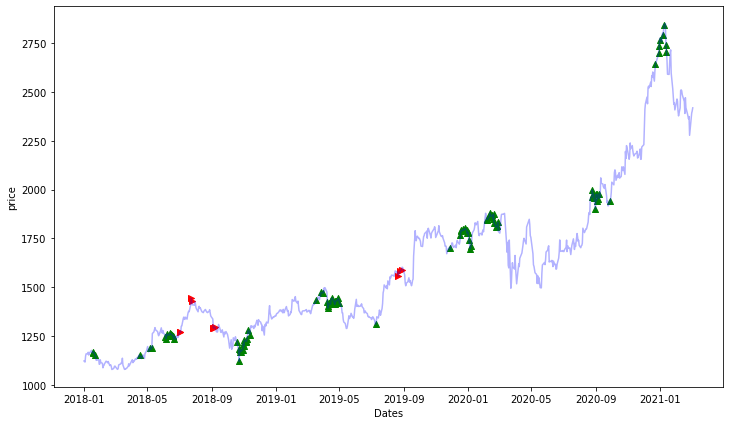

In [48]:
### visualizing buy and sell value with green and red color marker

plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='blue',alpha = 0.3)
plt.scatter(df_AP.index,df_AP['buy_price'],color='green', marker = '^', alpha = 1)
plt.scatter(df_AP.index,df_AP['sell_price'],color='red', marker = '>', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('price')
plt.show()

In [49]:
buy = pd.Series(buy_sell(df_AP,55,20)[0])
selll =  pd.Series(buy_sell(df_AP,55,20)[1])
buy.dropna(inplace=True)
selll.dropna(inplace=True)

In [50]:
profit = selll.values - buy.values[:10]

In [51]:
### profit you would make after selling 10 shares, according to the method you are selling 10 shares only throughout the time
profit.sum()

2016.4202880859375